<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Words don't come easy, or do they?
## A first excursion to natural language processing

[Project Gutenberg](https://www.gutenberg.org/)

In [7]:
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 23.0 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=2d6926216ef6d200d7436898c37db2ede9fb514af4862ef608264cc57682ba2c
  Stored in directory: /root/.cache/pip/wheels/1b/fa/c3/4c14e72101070c40b56c2bfb4617e510e68f121e4f736a5d2a
Successfully built httpsproxy-urllib2


[Jane Austen's Price and Prejudice](https://www.gutenberg.org/ebooks/1342) has ID number 1342 with the catalog.

In [8]:
target = 1342
import gutenbergpy.textget
raw = gutenbergpy.textget.get_text_by_id(target) # access the book content
content = gutenbergpy.textget.strip_headers(raw) # remove header metadata
text = content.decode("utf-8") # encoding of the content

In [9]:
len(text)

728742

In [10]:
print(text[:500])
print(text[-500:])






                            [Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Jane’s Letters._      _Chap 34._
                                   ]




                                PRIDE.
                   
 the most intimate terms. Darcy,
as well as Elizabeth, really loved them; and they were both ever
sensible of the warmest gratitude towards the persons who, by bringing
her into Derbyshire, had been the means of uniting them.

                            [Illustration:

                                  THE
                                  END
                                   ]




             CHISWICK PRESS:--CHARLES WHITTINGHAM AND CO.
                  TOOKS COURT, CHANCERY LANE, LONDON.

In [11]:
marker = 'It is a truth universally acknowledged'
start = text.index(marker)
othermarker = 'had been the means of uniting them.'
end = text.index(othermarker) + len(othermarker)
book = text[start:end]

In [12]:
print(book[:200])
print(book[-200:])
print(len(book))

It is a truth universally acknowledged, that a single man in possession
of a good fortune must be in want of a wife.

However little known the feelings or views of such a man may be on his
first enter
 Darcy,
as well as Elizabeth, really loved them; and they were both ever
sensible of the warmest gratitude towards the persons who, by bringing
her into Derbyshire, had been the means of uniting them.
694173


In [13]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
removed = book.translate(str.maketrans(punctuation, ' ' * len(punctuation))) # substitute with space
print(removed[:500])
print(removed[-500:])
print(len(removed))

It is a truth universally acknowledged  that a single man in possession
of a good fortune must be in want of a wife 

However little known the feelings or views of such a man may be on his
first entering a neighbourhood  this truth is so well fixed in the minds
of the surrounding families  that he is considered as the rightful
property of some one or other of their daughters 

“My dear Mr  Bennet ” said his lady to him one day  “have you heard that
Netherfield Park is let at last ”

Mr  Bennet r
is wife conducted herself  and she condescended to wait on
them at Pemberley  in spite of that pollution which its woods had
received  not merely from the presence of such a mistress  but the
visits of her uncle and aunt from the city 

With the Gardiners they were always on the most intimate terms  Darcy 
as well as Elizabeth  really loved them  and they were both ever
sensible of the warmest gratitude towards the persons who  by bringing
her into Derbyshire  had been the means of uniting them

Better. Note that the apostrophe is still there. We need to clean out non-ASCII punctuation as well.

In [15]:
import re # regular expressions
from string import printable
print('Allow these:', printable)

Allow these: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [16]:
forbid = f'[^{re.escape(printable)}]' # everything else must go

In [17]:
ok = re.sub(forbid, ' ', removed)
print(ok[:500])
print(ok[-500:])
print(len(ok))

It is a truth universally acknowledged  that a single man in possession
of a good fortune must be in want of a wife 

However little known the feelings or views of such a man may be on his
first entering a neighbourhood  this truth is so well fixed in the minds
of the surrounding families  that he is considered as the rightful
property of some one or other of their daughters 

 My dear Mr  Bennet   said his lady to him one day   have you heard that
Netherfield Park is let at last  

Mr  Bennet r
is wife conducted herself  and she condescended to wait on
them at Pemberley  in spite of that pollution which its woods had
received  not merely from the presence of such a mistress  but the
visits of her uncle and aunt from the city 

With the Gardiners they were always on the most intimate terms  Darcy 
as well as Elizabeth  really loved them  and they were both ever
sensible of the warmest gratitude towards the persons who  by bringing
her into Derbyshire  had been the means of uniting them

Now, there is a lot of whitespace there. Let's remove repeated spaces.

In [18]:
clean = re.compile(r'\s+')
cleaner = clean.sub(' ', ok) # remove repeated spaces
print(cleaner[:50])
print(cleaner[-50:])
print(len(cleaner))

It is a truth universally acknowledged that a sing
nto Derbyshire had been the means of uniting them 
665069


In [19]:
words = cleaner.split() # break it into individual words
print(len(words)) # how many words are there in the book
print(words[:5], words[-5:])

123648
['It', 'is', 'a', 'truth', 'universally'] ['the', 'means', 'of', 'uniting', 'them']


Let's get rid of all words that are in ALLCAPS. Nobody likes that and they seen to be headers anyhow.

In [20]:
print('HELLO'.isupper())
print('Hello'.isupper())

True
False


In [22]:
def keep(word):
  if len(word) < 2: # keep I and A
    return True
  return not word.isupper()

In [23]:
def opposite(word):
  return word.isupper()

In [24]:
good = list(filter(keep, words))
len(good)

123514

In [25]:
allcaps = set(list(filter(opposite, words)))
print(len(allcaps))

84


In [26]:
print(allcaps)

{'XL', 'LIII', 'XIV', 'M', 'XI', 'XXVIII', 'LV', 'A', 'LX', 'T', 'P', 'XXXVI', 'LII', 'XXXV', 'VI', 'IV', 'XXXII', 'BENNET', 'WILLIAM', 'XVII', 'LIX', 'XIX', 'XXV', 'FITZWILLIAM', 'CHAPTER', 'LVI', 'XXII', 'XXIV', 'XXXVII', 'XLV', 'LIV', 'XVIII', 'B', 'XLVII', 'XV', 'O', 'XXX', 'XXVII', 'XXXI', 'I', 'EDW', 'LXI', 'XXXIX', 'XLI', 'XLII', 'XLIX', 'GARDINER', 'F', 'XLVI', 'XLIV', 'VII', 'NIND', 'COLLINS', 'XXI', 'BINGLEY', 'II', 'XLIII', 'III', 'XXXIV', 'LYDIA', 'VIII', 'CAROLINE', 'XVI', 'H', 'XXIII', 'DARCY', 'X', 'XXXVIII', 'LVII', 'XXXIII', 'XIII', 'RIGHT', 'XLVIII', 'XII', 'L', 'W', 'XXVI', 'XXIX', 'V', 'E', 'XX', 'LI', 'LVIII', 'IX'}


In [27]:
good[:30]

['It',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged',
 'that',
 'a',
 'single',
 'man',
 'in',
 'possession',
 'of',
 'a',
 'good',
 'fortune',
 'must',
 'be',
 'in',
 'want',
 'of',
 'a',
 'wife',
 'However',
 'little',
 'known',
 'the',
 'feelings',
 'or',
 'views']

More obvious things to get rid of: words that are just *digits* and *stop words* like articles and prepositions.

In [65]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
print(sw)
sw.append('mr')
sw.append('mrs')
'mrs' in sw

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

True

In [30]:
'HELLO'.lower()

'hello'

In [33]:
'123'.isdigit()

True

In [78]:
def keepAgain(w):
  return not (w.lower() in sw) and not (w.isdigit()) and len(w) > 2

better = list(filter(keepAgain, good))
len(better)

53961

In [68]:
better[:30]

['truth',
 'universally',
 'acknowledged',
 'single',
 'man',
 'possession',
 'good',
 'fortune',
 'must',
 'want',
 'wife',
 'However',
 'little',
 'known',
 'feelings',
 'views',
 'man',
 'may',
 'first',
 'entering',
 'neighbourhood',
 'truth',
 'well',
 'fixed',
 'minds',
 'surrounding',
 'families',
 'considered',
 'rightful',
 'property']

Note that the singular and plural of the same word appear. We can make them match so that we could then better count how many times each word appears.

Let's try a simple rule: if a word is present both with and without an 's' suffix, remove the suffix.

In [41]:
test = 'animals'
print(test[-1])
print(test[-1] == 's')
print(test[:-1])

s
True
animal


In [79]:
distinct = set(better)

def singularize(word):
  lc = word.lower()
  if lc in distinct:
    word = lc
  if word[-1] == 's': # ends in 's'
    cropped = word[:-1]
    if cropped in distinct:
      return cropped
  return word

In [80]:
simple = [ singularize(w) for w in better ]
simple[:30]

['truth',
 'universally',
 'acknowledged',
 'single',
 'man',
 'possession',
 'good',
 'fortune',
 'must',
 'want',
 'wife',
 'however',
 'little',
 'known',
 'feeling',
 'view',
 'man',
 'may',
 'first',
 'entering',
 'neighbourhood',
 'truth',
 'well',
 'fixed',
 'mind',
 'surrounding',
 'families',
 'considered',
 'rightful',
 'property']

In [81]:
distinct = set(simple)
wordfreq = { w : better.count(w) for w in distinct } # count occurrences (this takes a LONG TIME)
len(wordfreq) # how many DISTINCT words are there

5578

In [82]:
wordfreq['perfect']

17

Let's look at the most frequent and the longest word to get a hang of what this contains.

In [83]:
import operator
print(max(wordfreq.items(), key = operator.itemgetter(1))[0]) # the most frequent word
print(min(wordfreq.items(), key = operator.itemgetter(1))[0]) # the least frequent word
print(max(wordfreq.keys(), key = len)) # the longest word
print(min(wordfreq.keys(), key = len)) # the shortest word

Elizabeth
generation
misrepresentation
pay


In [88]:
desc = sorted(wordfreq.items(), key = operator.itemgetter(1), reverse = True)

In [89]:
count = 25
for (word, freq) in desc:
  print(freq, word)
  count -= 1
  if count == 0:
    break

634 Elizabeth
514 could
467 would
418 Darcy
403 said
326 Bennet
325 much
308 must
307 Bingley
293 Jane
257 one
239 know
218 never
217 sister
215 soon
213 though
210 think
199 might
197 time
194 Wickham
190 well
189 good
187 may
187 little
178 Collins


In [90]:
!pip install wordcloud

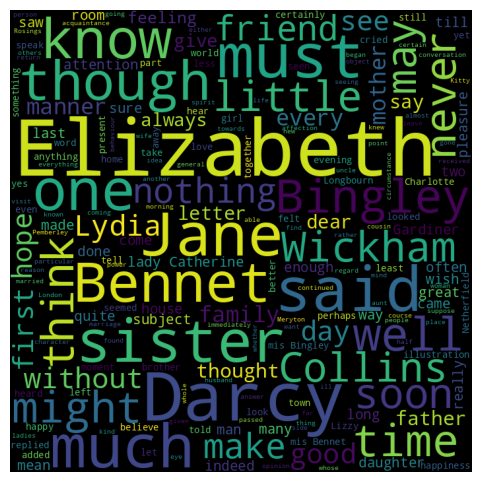

In [92]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

from wordcloud import WordCloud
t = ' '.join(simple)
cloud = WordCloud(width = 700, height = 700).generate(t)
plt.imshow(cloud)
plt.axis('off')
plt.show()

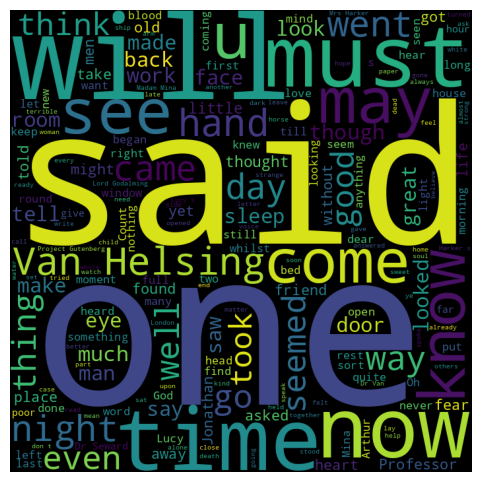

In [96]:
# quick and dirty, no preprocessing (pips and imports!)
dracula = gutenbergpy.textget.get_text_by_id(345).decode("utf-8")
dc = WordCloud(width = 700, height = 700).generate(dracula)
plt.imshow(dc)
plt.axis('off')
plt.show()

If you do not fancy books, it could be a movie script from https://imsdb.com/ as well.

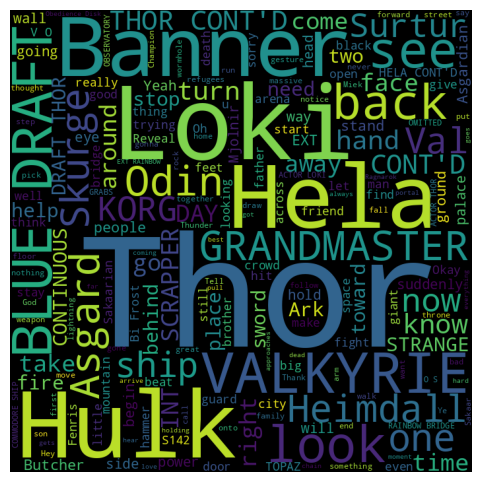

In [97]:
# adapted from https://stackoverflow.com/questions/328356/extracting-text-from-html-file-using-python
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://imsdb.com/scripts/Thor-Ragnarok.html"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
thor = soup.get_text()
dc = WordCloud(width = 700, height = 700).generate(thor)
plt.imshow(dc)
plt.axis('off')
plt.show()

Let's return to the book we cleaned up for one last stage:

In [174]:
import networkx as nx

middle = len(simple) // 2
length = 100

graph = nx.DiGraph() # for directed edges
sequence = simple.copy()[ (middle - length) : (middle + length) ] # just a fragment

In [175]:
print(sequence)
len(sequence)

['arrogance', 'conceit', 'selfish', 'disdain', 'feeling', 'others', 'form', 'groundwork', 'disapprobation', 'succeeding', 'event', 'built', 'immovable', 'dislike', 'known', 'month', 'felt', 'last', 'man', 'world', 'could', 'ever', 'prevailed', 'marry', 'said', 'quite', 'enough', 'madam', 'perfectly', 'comprehend', 'feeling', 'ashamed', 'forgive', 'taken', 'much', 'time', 'accept', 'best', 'wishes', 'health', 'happiness', 'word', 'hastily', 'left', 'room', 'Elizabeth', 'heard', 'next', 'moment', 'open', 'front', 'door', 'quit', 'house', 'tumult', 'mind', 'painfully', 'great', 'knew', 'support', 'actual', 'weakness', 'sat', 'cried', 'half', 'hour', 'astonishment', 'reflected', 'passed', 'increased', 'every', 'review', 'receive', 'offer', 'marriage', 'Darcy', 'love', 'many', 'month', 'much', 'love', 'wish', 'marry', 'spite', 'objection', 'made', 'prevent', 'friend', 'marrying', 'sister', 'must', 'appear', 'least', 'equal', 'force', 'case', 'almost', 'incredible', 'gratifying', 'inspired',

200

In [176]:
currentWord = sequence.pop(0)
while len(sequence) > 0:
  followingWord = sequence.pop(0)
  if graph.has_edge(currentWord, followingWord):
    graph[currentWord][followingWord]['weight'] += 1
  else:
    graph.add_edge(currentWord, followingWord, weight = 1)
  currentWord = followingWord

In [177]:
print(graph)

DiGraph with 183 nodes and 199 edges


In [178]:
pos = nx.spring_layout(graph) # calculate positions (this takes a long time)

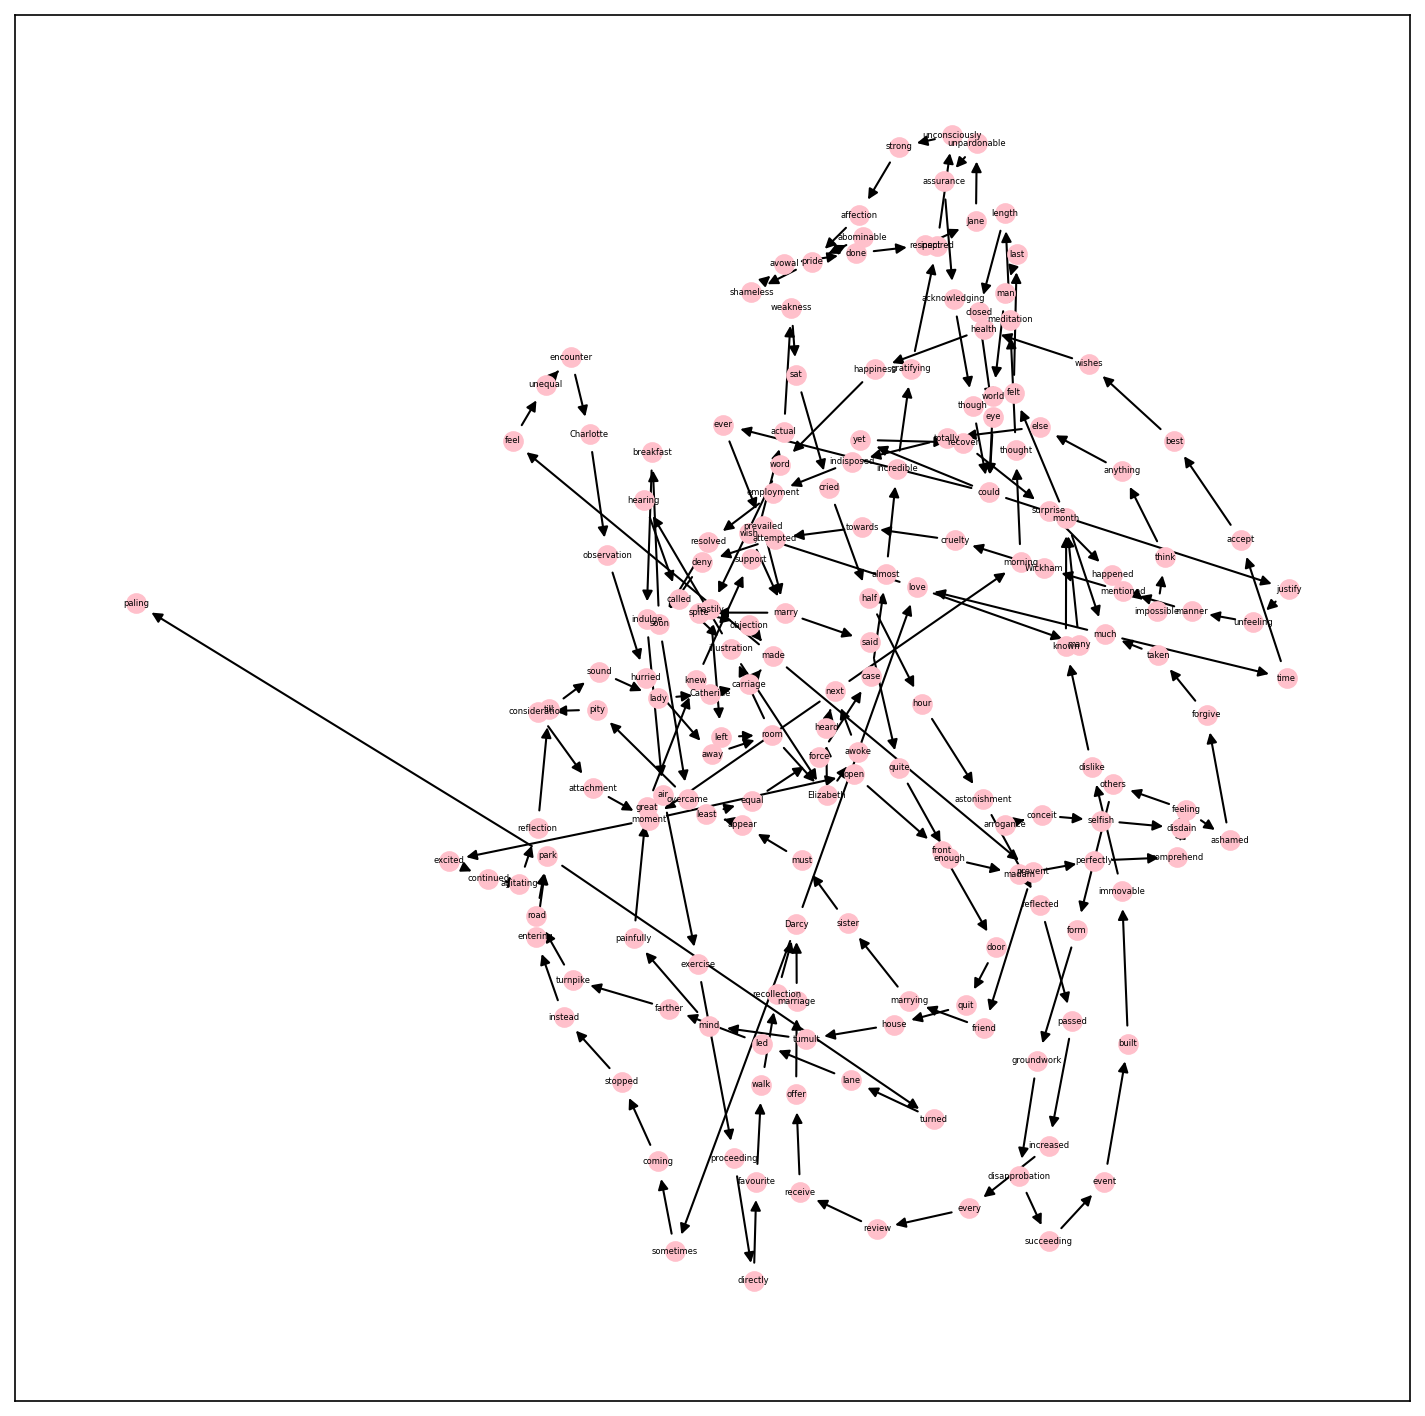

In [179]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (12, 12), dpi =  150)
V = nx.draw_networkx_nodes(graph, pos, node_size = 80, node_color = 'pink')

w = [ graph[u][v]['weight'] for u, v in graph.edges ]
E = nx.draw_networkx_edges(graph, pos, width = w)
vl = nx.draw_networkx_labels(graph, pos, font_size = 4)

In [167]:
g = nx.Graph()
whole = simple.copy()
currentWord = whole.pop(0)
while len(whole) > 0:
  followingWord = whole.pop(0)
  if g.has_edge(currentWord, followingWord):
    g[currentWord][followingWord]['weight'] += 1
  else:
    g.add_edge(currentWord, followingWord, weight = 1)
  currentWord = followingWord

In [168]:
print(g)

Graph with 5578 nodes and 44582 edges


In [169]:
ditch = []
threshold = 5
for e in g.edges():
  (s, t) = e
  if g[s][t]['weight'] < threshold:
    ditch.append(e)

len(ditch)

44152

In [170]:
g.remove_edges_from(ditch)
floaters = list(nx.isolates(g))
g.remove_nodes_from(floaters)
print(g)

Graph with 280 nodes and 430 edges


In [171]:
lcc = g.subgraph(max(nx.connected_components(g), key=len))

print(lcc)

Graph with 249 nodes and 414 edges


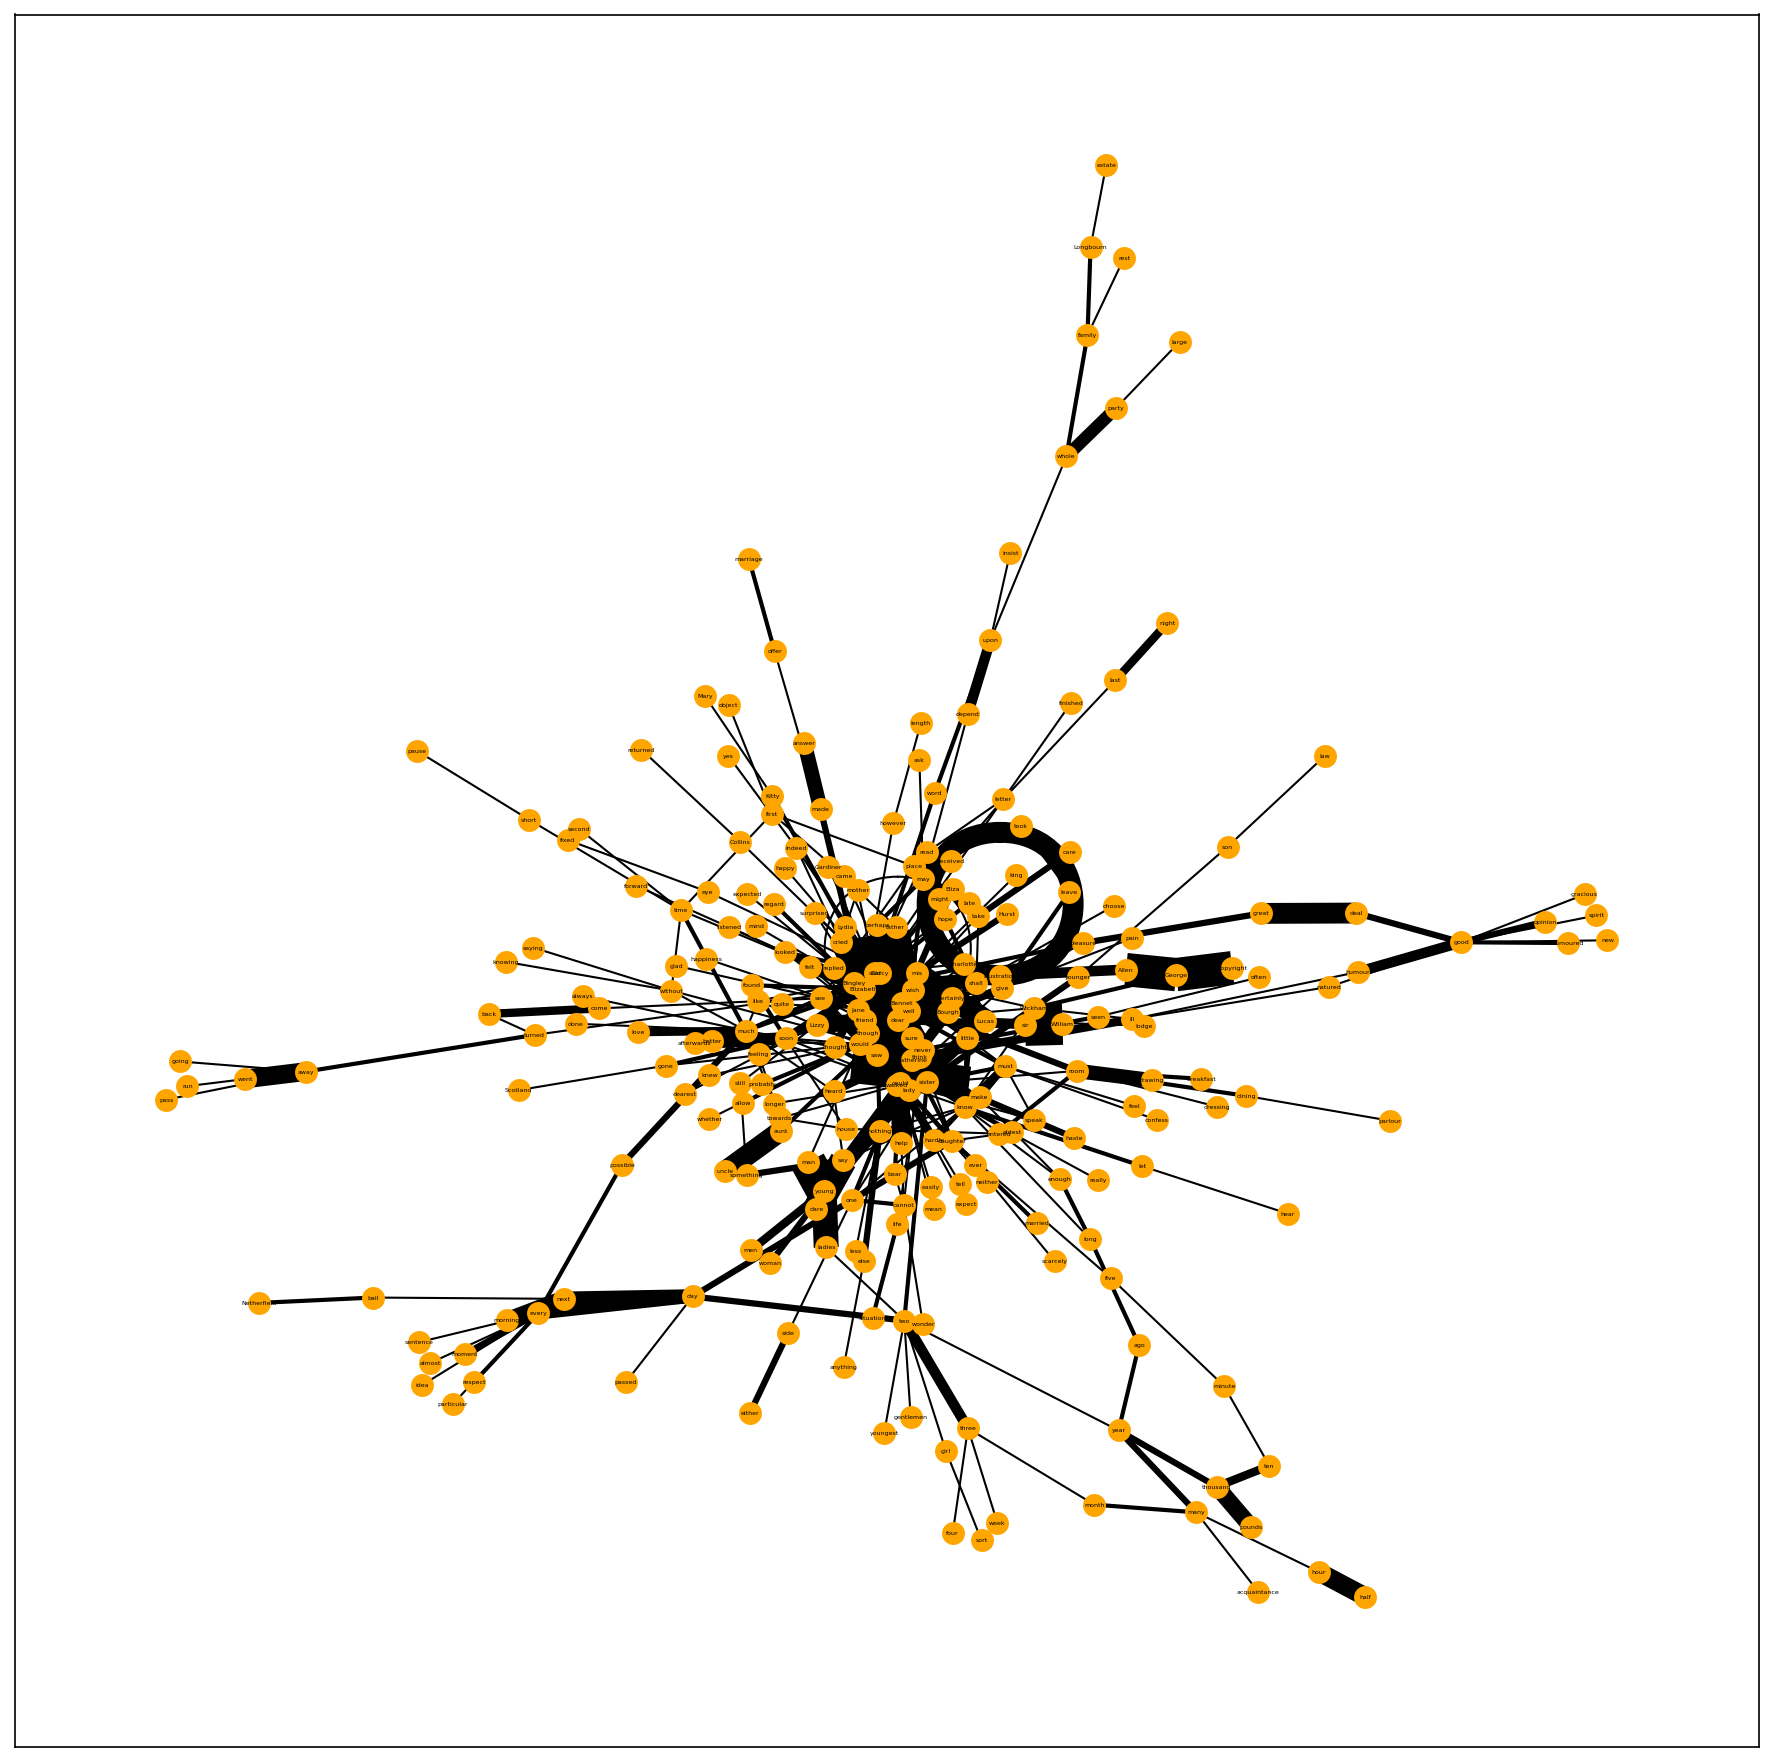

In [173]:
fig = plt.figure(1, figsize = (15, 15), dpi =  150)
p2 = nx.spring_layout(lcc)
V = nx.draw_networkx_nodes(lcc, p2, node_size = 100, node_color = 'orange')

w = [ (lcc[u][v]['weight'] - threshold) // 2 + 1 for u, v in lcc.edges ]

E = nx.draw_networkx_edges(lcc, p2, width = w)
vl = nx.draw_networkx_labels(lcc, p2, font_size = 3)
